In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
metrics = {"accuracy": 0.8, "f1_score": 0.75}
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor


In [2]:
train=pd.read_csv("new medicine.csv")

In [3]:
train.head(20)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Patient            92 non-null     object
 1   Medicine           92 non-null     object
 2   Disease            92 non-null     object
 3   Variety            92 non-null     object
 4   Quantity(Packets)  92 non-null     int64 
 5   Date               92 non-null     object
 6   Season             92 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.2+ KB


In [4]:
train.shape


train.describe()


train.isnull().sum()

Patient              0
Medicine             0
Disease              0
Variety              0
Quantity(Packets)    0
Date                 0
Season               0
dtype: int64

In [5]:
train.head()

Patient     Medicine  Disease     Variety  Quantity(Packets)  \
0         John Doe  Artemisinin  Malaria       Vivax                 10   
1       Jane Smith  Paracetamol    Fever   Influenza                 20   
2  Michael Johnson      Aspirin     Pain    Migraine                  8   
3      Emily Brown  Artemisinin  Malaria  Falciparum                 15   
4   David Williams    Ibuprofen     Pain    Headache                  7   

        Date Season  
0  4/15/2021    Wet  
1  2/20/2021    Dry  
2  3/10/2021    Wet  
3   4/5/2021    Wet  
4  5/12/2021    Wet

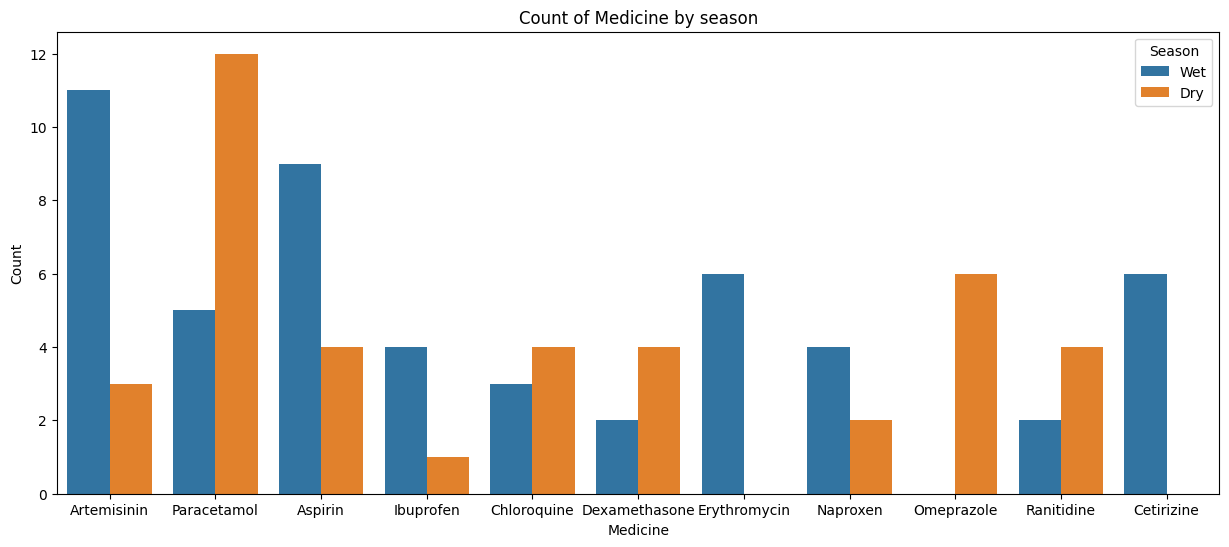

In [6]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Medicine', hue='Season', data=train)
plt.title('Count of Medicine by season')
plt.xlabel('Medicine')
plt.ylabel('Count')
plt.show()

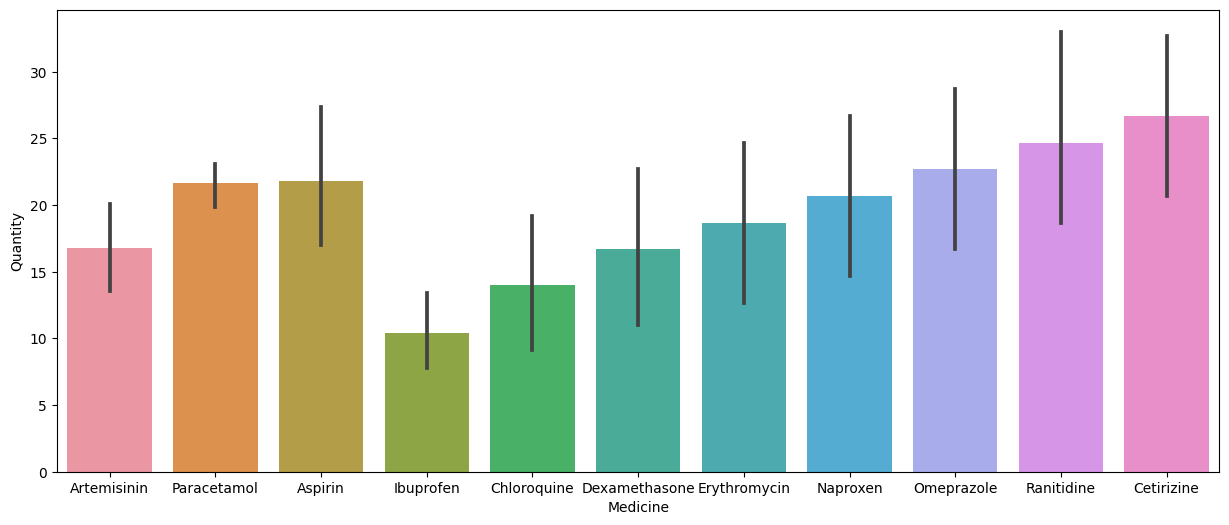

In [7]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Medicine', y='Quantity(Packets)', data=train)

plt.xlabel('Medicine')
plt.ylabel('Quantity')
plt.show()

array([[<Axes: title={'center': 'Quantity(Packets)'}>]], dtype=object)

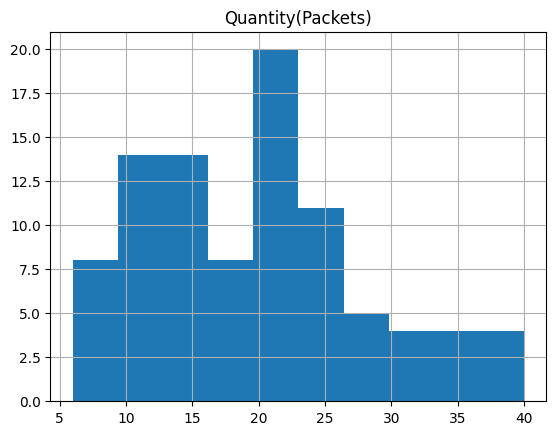

In [8]:
train.hist()

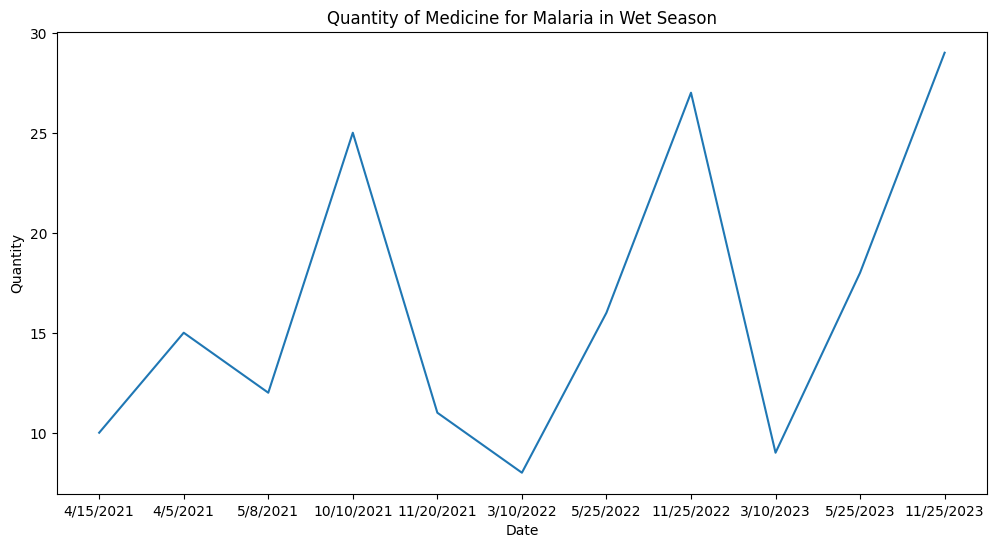

In [9]:
#choose the disease you want
Ds1 = "Artemisinin"

# Filter data for chosen disease and season
disease_data = train[(train["Medicine"] == Ds1) & (train["Season"] == "Wet")]


plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Quantity(Packets)', data=disease_data)

plt.title('Quantity of Medicine for Malaria in Wet Season')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

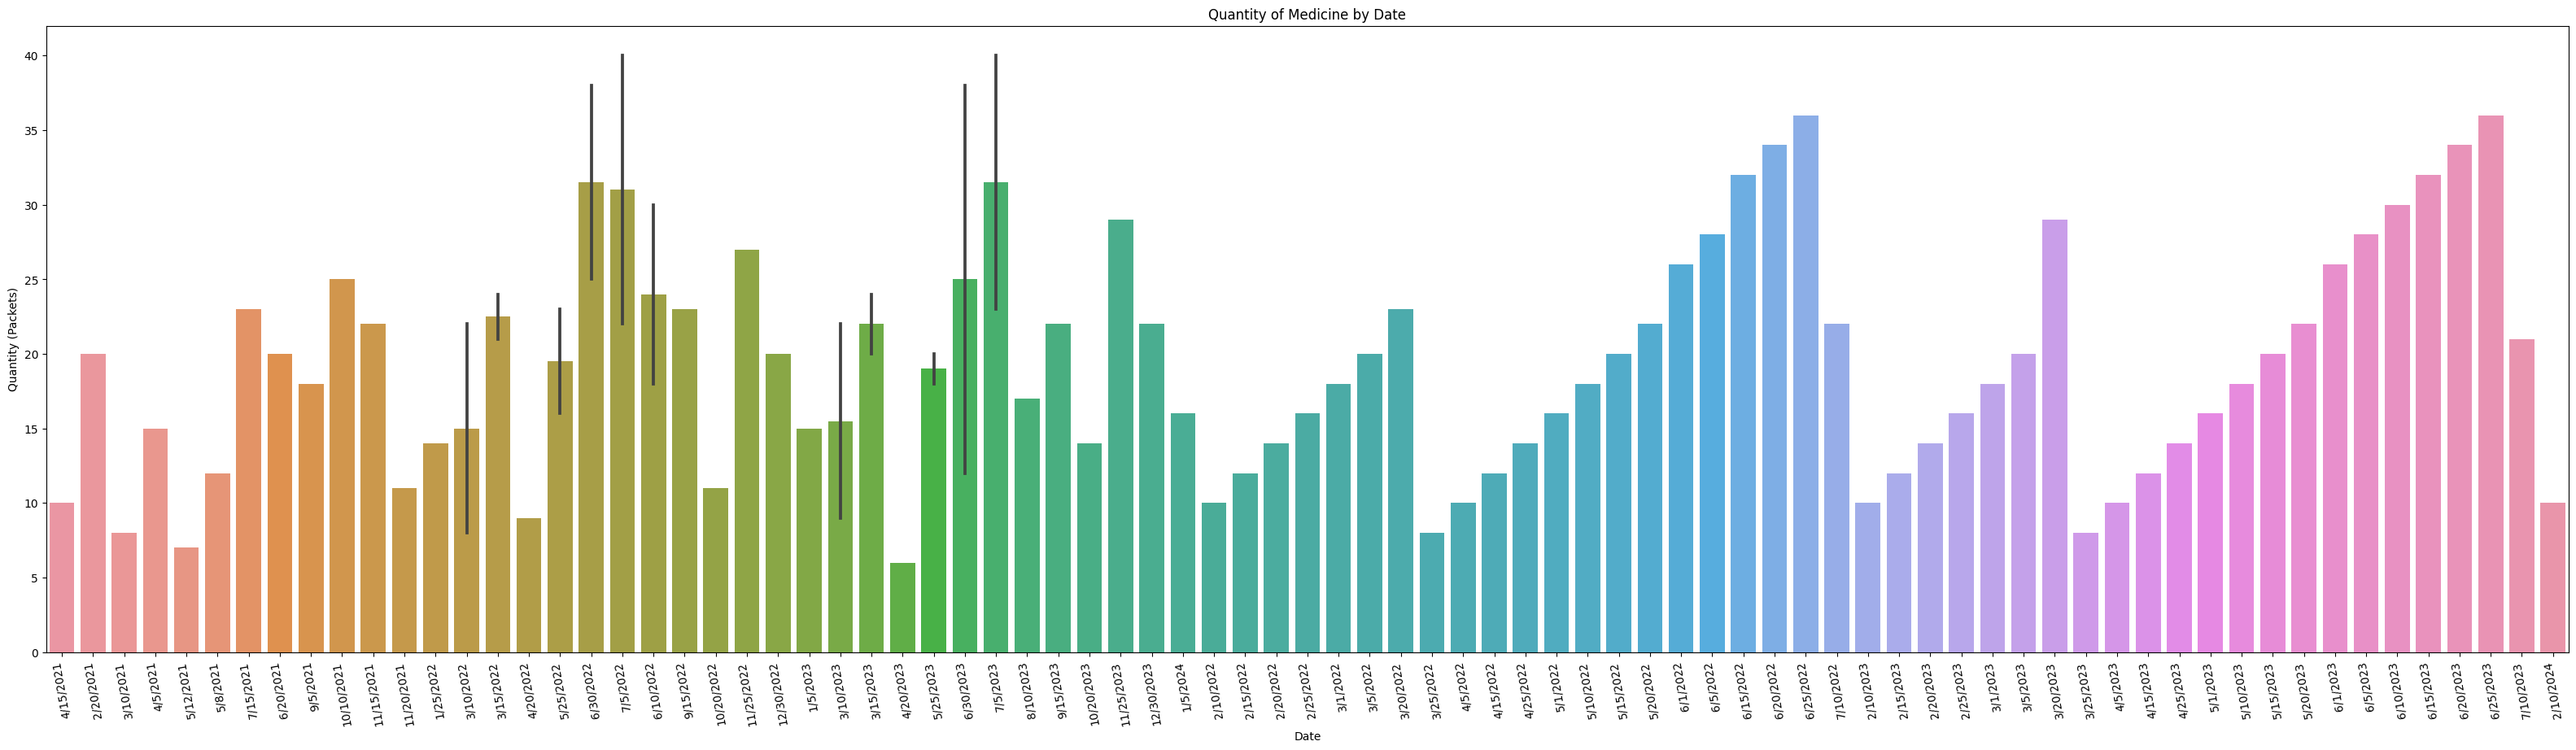

In [10]:
# Plot a bar chart of Quantity by Disease
plt.figure(figsize=(40, 10))
sns.barplot(x='Date', y='Quantity(Packets)', data=train)

plt.xlabel('Date')
plt.ylabel('Quantity (Packets)')
plt.title('Quantity of Medicine by Date')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=100)

plt.show()

In [11]:
# Import necessary libraries
import pandas_profiling

# Generate pandas profiling report for the selected_data dataframe
profile = train.profile_report()

# Print the pandas profiling report
print(profile)

# Generate data for the selected_data dataframe
data = train.sample(5)

# Print the generated data
print(data)

profile.to_notebook_iframe()  # View interactive report


              Patient       Medicine    Disease     Variety  \
15    Evelyn Anderson        Aspirin       Pain    Migraine   
38          Patient B  Dexamethasone  Arthritis   Influenza   
13      Mason Johnson    Artemisinin    Malaria       Vivax   
34  Benjamin Martinez    Artemisinin    Malaria  Falciparum   
46          Patient J    Chloroquine      Fever       Vivax   

    Quantity(Packets)        Date Season  
15                  9   4/20/2022    Wet  
38                 12   2/15/2022    Wet  
13                  8   3/10/2022    Wet  
34                 29  11/25/2023    Wet  
46                  8   3/25/2022    Dry  


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
train_data=train

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Patient            92 non-null     object
 1   Medicine           92 non-null     object
 2   Disease            92 non-null     object
 3   Variety            92 non-null     object
 4   Quantity(Packets)  92 non-null     int64 
 5   Date               92 non-null     object
 6   Season             92 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.2+ KB


In [14]:
train_data["Date"]=pd.to_datetime(train_data["Date"])

train_data['Date']=train_data['Date'].dt.to_period("M")

monthly_sales=train_data.groupby("Date").sum().reset_index()

monthly_sales=monthly_sales['Date'].dt.to_timestamp()

train.head(50)

Patient       Medicine    Disease      Variety  \
0            John Doe    Artemisinin    Malaria        Vivax   
1          Jane Smith    Paracetamol      Fever    Influenza   
2     Michael Johnson        Aspirin       Pain     Migraine   
3         Emily Brown    Artemisinin    Malaria   Falciparum   
4      David Williams      Ibuprofen       Pain     Headache   
5        Sarah Wilson    Artemisinin    Malaria        Vivax   
6      James Anderson    Paracetamol      Fever  Common Cold   
7         Emma Taylor    Artemisinin    Malaria   Falciparum   
8       Olivia Miller        Aspirin       Pain    Back Pain   
9      Ethan Martinez    Artemisinin    Malaria        Vivax   
10        Ava Jackson    Paracetamol      Fever    Influenza   
11         Liam Brown    Artemisinin    Malaria   Falciparum   
12      Sophia Taylor      Ibuprofen       Pain     Headache   
13      Mason Johnson    Artemisinin    Malaria        Vivax   
14      Harper Wilson    Paracetamol      Fever  Common Cold   
15    Evelyn Anderson        Aspirin       Pain     Migraine   
16        Logan Smith    Artemisinin    Malaria   Falciparum   
17       Mia Williams    Paracetamol      Fever    Influenza   
18       Elijah Brown        Aspirin       Pain    Back Pain   
19  Charlotte Johnson    Artemisinin    Malaria        Vivax   
20      Oliver Taylor    Paracetamol      Fever  Common Cold   
21      Amelia Miller      Ibuprofen       Pain     Headache   
22  Benjamin Martinez    Artemisinin    Malaria   Falciparum   
23       Emma Jackson    Paracetamol      Fever    Influenza   
24         Noah Brown        Aspirin       Pain     Migraine   
25        Mia Johnson    Artemisinin    Malaria        Vivax   
26     William Wilson    Paracetamol      Fever  Common Cold   
27    Sophia Anderson      Ibuprofen       Pain     Headache   
28        James Smith    Artemisinin    Malaria   Falciparum   
29    Olivia Williams    Paracetamol      Fever    Influenza   
30       Elijah Brown        Aspirin       Pain    Back Pain   
31        Ava Johnson    Artemisinin    Malaria        Vivax   
32       Logan Taylor    Paracetamol      Fever  Common Cold   
33         Mia Miller      Ibuprofen       Pain     Headache   
34  Benjamin Martinez    Artemisinin    Malaria   Falciparum   
35       Emma Jackson    Paracetamol      Fever    Influenza   
36         Noah Brown        Aspirin       Pain     Migraine   
37          Patient A    Chloroquine      Fever        Vivax   
38          Patient B  Dexamethasone  Arthritis    Influenza   
39          Patient C   Erythromycin  Pneumonia     Migraine   
40          Patient D       Naproxen   Diabetes     Headache   
41          Patient E     Omeprazole     Asthma    Back Pain   
42          Patient F     Ranitidine  Gastritis  Common Cold   
43          Patient G     Cetirizine    Allergy     Headache   
44          Patient H        Aspirin       Pain     Migraine   
45          Patient I    Paracetamol      Fever  Common Cold   
46          Patient J    Chloroquine      Fever        Vivax   
47          Patient K  Dexamethasone  Arthritis    Influenza   
48          Patient L   Erythromycin  Pneumonia     Migraine   
49          Patient M       Naproxen   Diabetes     Headache   

    Quantity(Packets)     Date Season  
0                  10  2021-04    Wet  
1                  20  2021-02    Dry  
2                   8  2021-03    Wet  
3                  15  2021-04    Wet  
4                   7  2021-05    Wet  
5                  12  2021-05    Wet  
6                  23  2021-07    Dry  
7                  20  2021-06    Dry  
8                  18  2021-09    Wet  
9                  25  2021-10    Wet  
10                 22  2021-11    Wet  
11                 11  2021-11    Wet  
12                 14  2022-01    Dry  
13                  8  2022-03    Wet  
14                 21  2022-03    Wet  
15                  9  2022-04    Wet  
16                 16  2022-05    Wet  
17                 25  2022-0

In [15]:
# Sample Period object
period = pd.Period("2023-11")

# Correct approaches:
year = period.year  # Extract year as an integer
timestamp = period.to_timestamp().timestamp()
period_str = str(period)  # Convert to string

In [16]:
# Print the updated dataframe

train_data["Year"]=train["Date"].dt.year
train_data["Month"]=train["Date"].dt.month


train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   Patient            92 non-null     object   
 1   Medicine           92 non-null     object   
 2   Disease            92 non-null     object   
 3   Variety            92 non-null     object   
 4   Quantity(Packets)  92 non-null     int64    
 5   Date               92 non-null     period[M]
 6   Season             92 non-null     object   
 7   Year               92 non-null     int64    
 8   Month              92 non-null     int64    
dtypes: int64(3), object(5), period[M](1)
memory usage: 6.6+ KB


In [17]:
train_data.head

<bound method NDFrame.head of             Patient     Medicine    Disease      Variety  Quantity(Packets)  \
0          John Doe  Artemisinin    Malaria        Vivax                 10   
1        Jane Smith  Paracetamol      Fever    Influenza                 20   
2   Michael Johnson      Aspirin       Pain     Migraine                  8   
3       Emily Brown  Artemisinin    Malaria   Falciparum                 15   
4    David Williams    Ibuprofen       Pain     Headache                  7   
..              ...          ...        ...          ...                ...   
87        Patient Y   Ranitidine  Gastritis  Common Cold                 36   
88        Patient Z   Cetirizine    Allergy     Headache                 38   
89        Patient A      Aspirin       Pain     Migraine                 40   
90        Patient B  Paracetamol      Fever  Common Cold                 21   
91        Patient C  Chloroquine      Fever        Vivax                 10   

       Date Season  Y

In [18]:
train_data=train_data.join(pd.get_dummies(train.Disease)).drop(['Disease'],axis=1)

In [19]:
train_data=train_data.join(pd.get_dummies(train.Season)).drop(['Season'],axis=1)

In [20]:
train_data=train_data.join(pd.get_dummies(train.Medicine)).drop(['Medicine'],axis=1)

In [21]:
train_data


Patient      Variety  Quantity(Packets)     Date  Year  Month  \
0          John Doe        Vivax                 10  2021-04  2021      4   
1        Jane Smith    Influenza                 20  2021-02  2021      2   
2   Michael Johnson     Migraine                  8  2021-03  2021      3   
3       Emily Brown   Falciparum                 15  2021-04  2021      4   
4    David Williams     Headache                  7  2021-05  2021      5   
..              ...          ...                ...      ...   ...    ...   
87        Patient Y  Common Cold                 36  2023-06  2023      6   
88        Patient Z     Headache                 38  2023-06  2023      6   
89        Patient A     Migraine                 40  2023-07  2023      7   
90        Patient B  Common Cold                 21  2023-07  2023      7   
91        Patient C        Vivax                 10  2024-02  2024      2   

    Allergy  Arthritis  Asthma  Diabetes  ...  Aspirin  Cetirizine  \
0     False      False   False     False  ...    False       False   
1     False      False   False     False  ...    False       False   
2     False      False   False     False  ...     True       False   
3     False      False   False     False  ...    False       False   
4     False      False   False     False  ...    False       False   
..      ...        ...     ...       ...  ...      ...         ...   
87    False      False   False     False  ...    False       False   
88     True      False   False     False  ...    False        True   
89    False      False   False     False  ...     True       False   
90    False      False   False     False  ...    False       False   
91    False      False   False     False  ...    False       False   

    Chloroquine  Dexamethasone  Erythromycin  Ibuprofen  Naproxen  Omeprazole  \
0         False          False         False      False     False       False   
1         False          False         False      False     False       False   
2         False          False         False      False     False       False   
3         False          False         False      False     False       False   
4         False          False         False       True     False       False   
..          ...            ...           ...        ...       ...         ...   
87        False          False         False      False     False       False   
88        False          False         False      False     False       False   
89        False          False         False      False     False       False   
90        False          False         False      False     False       False   
91         True          False         False      False     False       False   

    Paracetamol  Ranitidine  
0         False       False  
1          True       False  
2         False       False  
3         False       False  
4         False       False  
..          ...         ...  
87        False        True  
88        False       False  
89        False       False  
90         True       False  
91        False       False  

[92 rows x 28 columns]

In [22]:
profile = train_data.profile_report()

# Print the pandas profiling report
print(profile)

# Generate data for the selected_data dataframe
data = train_data.sample(5)

print(data)

profile.to_notebook_iframe()  # View interactive report



              Patient     Variety  Quantity(Packets)     Date  Year  Month  \
22  Benjamin Martinez  Falciparum                 27  2022-11  2022     11   
9      Ethan Martinez       Vivax                 25  2021-10  2021     10   
23       Emma Jackson   Influenza                 20  2022-12  2022     12   
52          Patient P    Headache                 20  2022-05  2022      5   
2     Michael Johnson    Migraine                  8  2021-03  2021      3   

    Allergy  Arthritis  Asthma  Diabetes  ...  Aspirin  Cetirizine  \
22    False      False   False     False  ...    False       False   
9     False      False   False     False  ...    False       False   
23    False      False   False     False  ...    False       False   
52     True      False   False     False  ...    False        True   
2     False      False   False     False  ...     True       False   

    Chloroquine  Dexamethasone  Erythromycin  Ibuprofen  Naproxen  Omeprazole  \
22        False          Fal

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
data.head()

train_data= train_data.drop(['Patient','Date','Variety'], axis=1)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Quantity(Packets)  92 non-null     int64
 1   Year               92 non-null     int64
 2   Month              92 non-null     int64
 3   Allergy            92 non-null     bool 
 4   Arthritis          92 non-null     bool 
 5   Asthma             92 non-null     bool 
 6   Diabetes           92 non-null     bool 
 7   Fever              92 non-null     bool 
 8   Gastritis          92 non-null     bool 
 9   Malaria            92 non-null     bool 
 10  Pain               92 non-null     bool 
 11  Pneumonia          92 non-null     bool 
 12  Dry                92 non-null     bool 
 13  Wet                92 non-null     bool 
 14  Artemisinin        92 non-null     bool 
 15  Aspirin            92 non-null     bool 
 16  Cetirizine         92 non-null     bool 
 17  Chloroquine       

In [24]:
train_data.head()

Quantity(Packets)  Year  Month  Allergy  Arthritis  Asthma  Diabetes  \
0                 10  2021      4    False      False   False     False   
1                 20  2021      2    False      False   False     False   
2                  8  2021      3    False      False   False     False   
3                 15  2021      4    False      False   False     False   
4                  7  2021      5    False      False   False     False   

   Fever  Gastritis  Malaria  ...  Aspirin  Cetirizine  Chloroquine  \
0  False      False     True  ...    False       False        False   
1   True      False    False  ...    False       False        False   
2  False      False    False  ...     True       False        False   
3  False      False     True  ...    False       False        False   
4  False      False    False  ...    False       False        False   

   Dexamethasone  Erythromycin  Ibuprofen  Naproxen  Omeprazole  Paracetamol  \
0          False         False      False     False       False        False   
1          False         False      False     False       False         True   
2          False         False      False     False       False        False   
3          False         False      False     False       False        False   
4          False         False       True     False       False        False   

   Ranitidine  
0       False  
1       False  
2       False  
3       False  
4       False  

[5 rows x 25 columns]

In [25]:
X=train_data.drop(['Quantity(Packets)'], axis=1)

In [26]:
y=train_data['Quantity(Packets)']

In [27]:

pd.set_option('display.max_columns', None)
X.describe

<bound method NDFrame.describe of     Year  Month  Allergy  Arthritis  Asthma  Diabetes  Fever  Gastritis  \
0   2021      4    False      False   False     False  False      False   
1   2021      2    False      False   False     False   True      False   
2   2021      3    False      False   False     False  False      False   
3   2021      4    False      False   False     False  False      False   
4   2021      5    False      False   False     False  False      False   
..   ...    ...      ...        ...     ...       ...    ...        ...   
87  2023      6    False      False   False     False  False       True   
88  2023      6     True      False   False     False  False      False   
89  2023      7    False      False   False     False  False      False   
90  2023      7    False      False   False     False   True      False   
91  2024      2    False      False   False     False   True      False   

    Malaria   Pain  Pneumonia    Dry    Wet  Artemisinin  Aspirin

In [28]:
y.head()


0    10
1    20
2     8
3    15
4     7
Name: Quantity(Packets), dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X.shape, X_train.shape, X_test.shape)


(92, 24) (73, 24) (19, 24)


In [30]:
# Create and fit the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 22.133365204678366


In [31]:
'''from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)'''

'from sklearn.ensemble import GradientBoostingRegressor\nmodel = GradientBoostingRegressor()\n\n# Train the model\nmodel.fit(X_train, y_train)\n\n# Make predictions on the testing set\npredictions = model.predict(X_test)\n\n# Evaluate the model\nmse = mean_squared_error(y_test, predictions)\nprint("Mean Squared Error:", mse)'

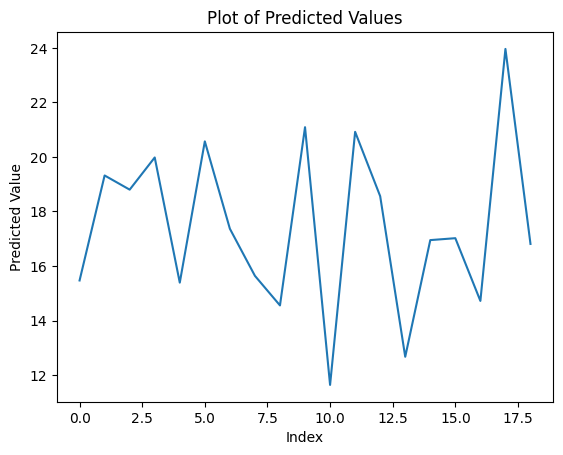

In [32]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Make predictions on the testing set
predictions = model.predict(X_test)


# Plot the predicted values
plt.plot(predictions)
plt.xlabel('Index')
plt.ylabel('Predicted Value')
plt.title('Plot of Predicted Values')
plt.show()

In [33]:
import pickle
pickle.dump(model,open("model_saved","wb"))


In [34]:
model_loaded=pickle.load(open('model_saved','rb'))
                        
            

In [35]:
model_loaded.predict(X_test)

array([15.47      , 19.32      , 18.8       , 19.98      , 15.39      ,
       20.57      , 17.36666667, 15.64      , 14.555     , 21.09      ,
       11.64      , 20.92      , 18.56      , 12.67166667, 16.95      ,
       17.02      , 14.72      , 23.96      , 16.81      ])